In [1]:
# Copyright (c) 2015-2016, the authors (see AUTHORS.txt).
# Licensed under the BSD 3-clause license (see LICENSE.txt)

import unittest
import numpy as np
import deepgp
import GPy
import os
import h5py
import tables

base_path = os.path.dirname("__file__")


In [2]:
datafile = 'random_10_3.txt'
modelfile = 'dgp_unsupervised.h5'

# Load data
Y = np.loadtxt(os.path.join(base_path,datafile))
print(Y.shape)
m = deepgp.DeepGP([Y.shape[1],5,2],Y,kernels=[GPy.kern.RBF(5,ARD=True), GPy.kern.RBF(2,ARD=True)], num_inducing=2, back_constraint=False)
print(m)
m.optimize()
print(m)


(10, 3)

Name : deepgp
Objective : 3556.2439813534816
Number of Parameters : 169
Number of Optimization Parameters : 169
Updates : True
Parameters:
  deepgp.                           |    value  |  constraints  |  priors
  obslayer.inducing_inputs          |   (2, 5)  |               |        
  obslayer.rbf.variance             |      1.0  |      +ve      |        
  obslayer.rbf.lengthscale          |     (5,)  |      +ve      |        
  obslayer.Gaussian_noise.variance  |      1.0  |      +ve      |        
  obslayer.Kuu_var                  |     (2,)  |      +ve      |        
  obslayer.latent_space.mean        |  (10, 5)  |               |        
  obslayer.latent_space.variance    |  (10, 5)  |      +ve      |        
  layer_1.inducing_inputs           |   (2, 2)  |               |        
  layer_1.rbf.variance              |      1.0  |      +ve      |        
  layer_1.rbf.lengthscale           |     (2,)  |      +ve      |        
  layer_1.Gaussian_noise.variance   | 

In [3]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16,8)
%matplotlib notebook

In [6]:
np.random.seed(0)
n = 30 # number of data
d = 1  # number of dimensions
# dependent variable is linearly spaced.
X = np.linspace(0,1,n)[:,None]
# response variable is step function
Y = np.where(X>0.5, 1,0) + np.random.randn(n,1)*0.02
# where to plot the model predictions
Xtest = np.linspace(-1,2,500)[:,None]

In [27]:
model0 = GPy.models.GPRegression(X,Y)
model0.optimize('bfgs', max_iters=1000, messages=1)
print(model0)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0007  -4.477888e-01   2.720447e+01 
    00s03  0013  -2.684731e+00   4.198127e-02 
    00s04  0014  -2.687343e+00   3.528841e-03 
    00s05  0018  -2.687679e+00   2.901751e-10 
Runtime:     00s05
Optimization status: Converged


Name : GP regression
Objective : -2.6876791383070007
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |           value  |  constraints  |  priors
  rbf.variance             |  0.339763590081  |      +ve      |        
  rbf.lengthscale          |    0.1605494838  |      +ve      |        
  Gaussian_noise.variance  |  0.019691043382  |      +ve      |        


<IPython.core.display.Javascript object>


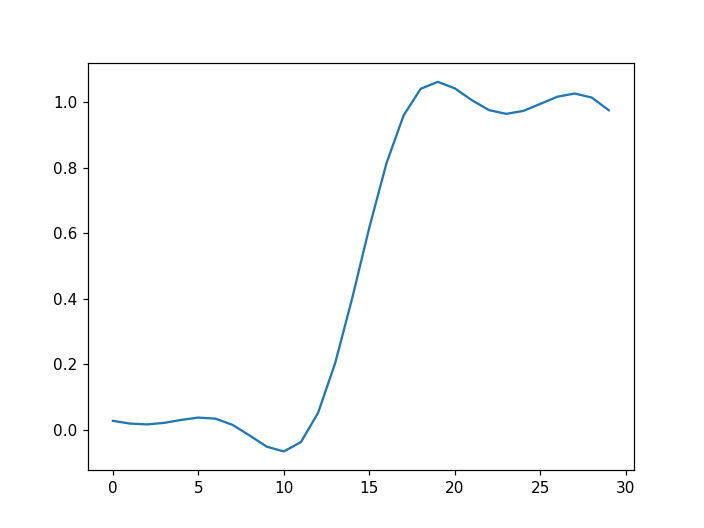

<IPython.core.display.Javascript object>


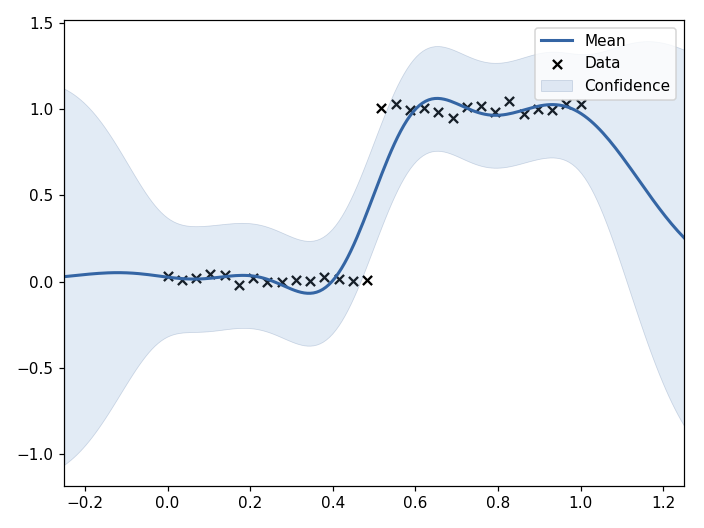

<IPython.core.display.Javascript object>


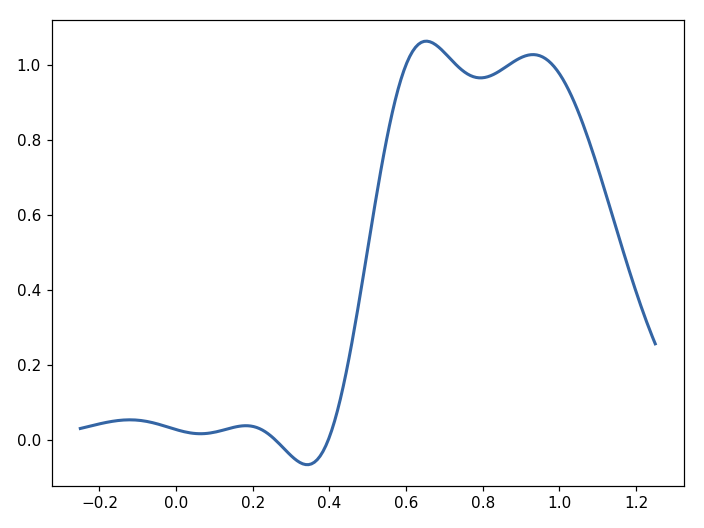

In [41]:
pm = model0.
plt.figure()
plt.plot(pm)
model0.plot()
model0.plot_mean()

In [43]:
# deepgp
# Load data
print(X.shape)
print(Y.shape)
Qs = 1
m = deepgp.DeepGP([Y.shape[1],1],Y,kernels=[GPy.kern.RBF(1,ARD=True)], num_inducing=15, back_constraint=False)
mean1 = m.obslayer.latent_space.mean
print(m)
m.optimize()
print(m)
mean2 = m.obslayer.latent_space.mean

(30, 1)
(30, 1)

Name : deepgp
Objective : 95.36054865133646
Number of Parameters : 93
Number of Optimization Parameters : 93
Updates : True
Parameters:
  deepgp.                           |    value  |  constraints  |  priors
  obslayer.inducing_inputs          |  (15, 1)  |               |        
  obslayer.rbf.variance             |      1.0  |      +ve      |        
  obslayer.rbf.lengthscale          |      1.0  |      +ve      |        
  obslayer.Gaussian_noise.variance  |      1.0  |      +ve      |        
  obslayer.Kuu_var                  |    (15,)  |      +ve      |        
  obslayer.latent_space.mean        |  (30, 1)  |               |        
  obslayer.latent_space.variance    |  (30, 1)  |      +ve      |        

Name : deepgp
Objective : -0.6736027425533706
Number of Parameters : 93
Number of Optimization Parameters : 93
Updates : True
Parameters:
  deepgp.                           |              value  |  constraints  |  priors
  obslayer.inducing_inputs      

In [42]:
m.
# plt.figure()
# plt.plot(mean1)
# plt.plot(mean2)

(30, 1)
(30, 1)

Name : deepgp
Objective : 94.71322966709218
Number of Parameters : 93
Number of Optimization Parameters : 93
Updates : True
Parameters:
  deepgp.                           |    value  |  constraints  |  priors
  obslayer.inducing_inputs          |  (15, 1)  |               |        
  obslayer.rbf.variance             |      1.0  |      +ve      |        
  obslayer.rbf.lengthscale          |      1.0  |      +ve      |        
  obslayer.Gaussian_noise.variance  |      1.0  |      +ve      |        
  obslayer.Kuu_var                  |    (15,)  |      +ve      |        
  obslayer.latent_space.mean        |  (30, 1)  |               |        
  obslayer.latent_space.variance    |  (30, 1)  |      +ve      |        

Name : deepgp
Objective : -0.6926622370004765
Number of Parameters : 93
Number of Optimization Parameters : 93
Updates : True
Parameters:
  deepgp.                           |              value  |  constraints  |  priors
  obslayer.inducing_inputs      

AttributeError: 'DeepGP' object has no attribute 'plot'